# Practical example of Linear Regression in sklearn

In this notebook I demonsrate the use of sklearns LinearRegression class on a car sales dataset.

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

To simplify the model we will not include car `Model` 

In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

While not really recommended, we will drop the missing values here - they account for <5% of the data.

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

<AxesSubplot:xlabel='Price', ylabel='Count'>

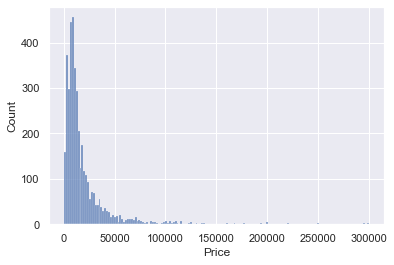

In [8]:
sns.histplot(data_no_mv['Price'])

### Dealing with outliers

There appear to be some outliers in the `Price` column. One simple way of dealing with this is to remove 0.5% or 1% of the data, in this case from the high price side of the graph. We then do the ame with the `Mileage`, `EngineV` and `Year` columns.

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<AxesSubplot:xlabel='Price', ylabel='Count'>

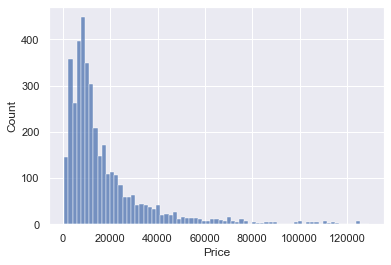

In [10]:
sns.histplot(data_1['Price'])

#### Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

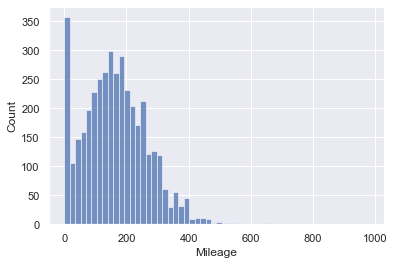

In [11]:
sns.histplot(data_no_mv['Mileage'])

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

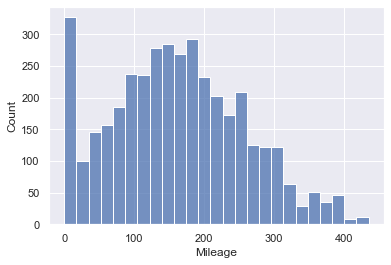

In [13]:
sns.histplot(data_2['Mileage'])

#### Engine volume

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

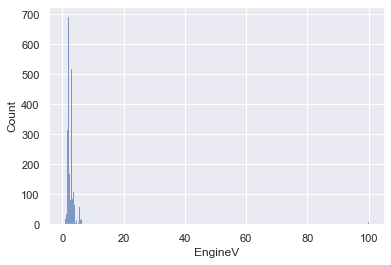

In [14]:
sns.histplot(data_no_mv['EngineV'])

For the `EngineV` data we can restrict the data to sensible engine sizes, as even the most powerful supercars rarely have sizes above 8l.

In [15]:
data_3 = data_2[data_2['EngineV']<8]

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

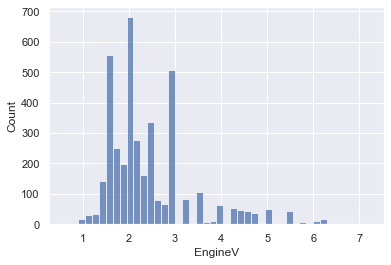

In [16]:
sns.histplot(data_3['EngineV'])

#### Year

<AxesSubplot:xlabel='Year', ylabel='Count'>

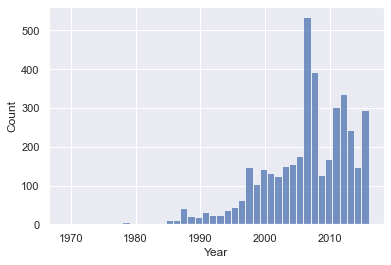

In [17]:
sns.histplot(data_no_mv['Year'])

In [18]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<AxesSubplot:xlabel='Year', ylabel='Count'>

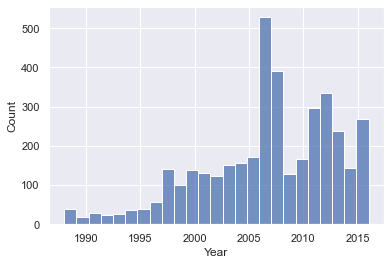

In [19]:
sns.histplot(data_4['Year'])

In [20]:
data_cleaned = data_4.reset_index(drop=True)

In [21]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3869,3869.000000,3869,3869.000000,3869.000000,3869,3869,3869.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1469,NaN,NaN,1807,3507,NaN
mean,NaN,18196.862267,NaN,160.532437,2.452714,NaN,NaN,2006.711295
std,NaN,19083.381768,NaN,95.610571,0.954409,NaN,NaN,6.102717
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

We now look at some relationships between features and `Price` to make sure things are behaving.

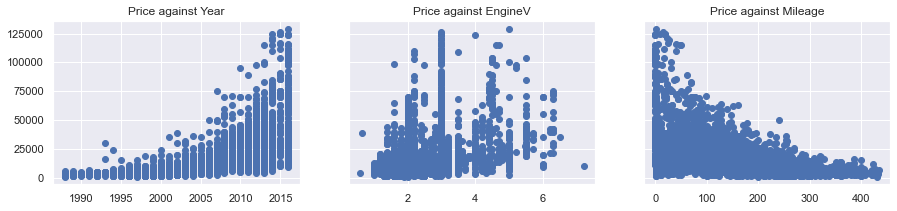

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price against Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price against EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price against Mileage')


plt.show()

There seems to be an exponential relationship at work here so we can try to take a log transform of the price data.

<AxesSubplot:xlabel='Price', ylabel='Count'>

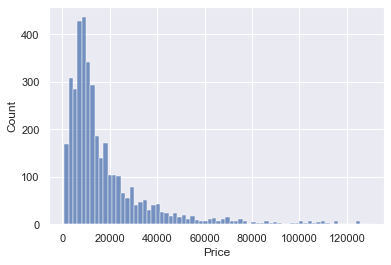

In [23]:
sns.histplot(data_cleaned['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

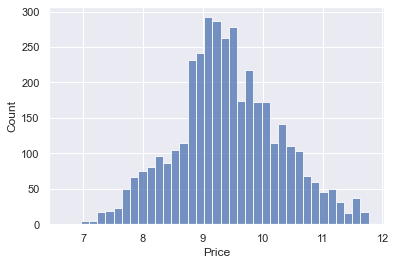

In [24]:
sns.histplot(np.log(data_cleaned['Price']))

### Relaxing the assumptions

In [25]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


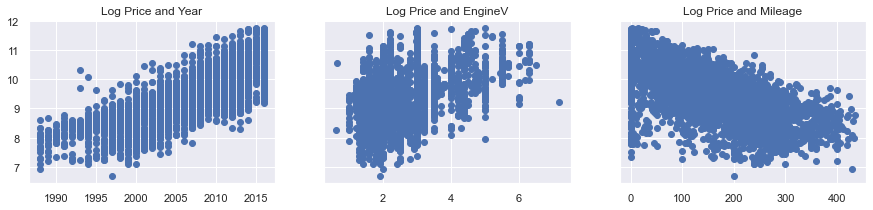

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

This looks much more linear, especially for the `Year` data.

In [27]:
data_log_price = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

We can check for multicollinearity by calculating the variance inflation factor for the numerical variables.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_log_price[['Year','EngineV', 'Mileage']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [29]:
vif

,VIF,features
0,10.303342,Year
1,7.604155,EngineV
2,3.792512,Mileage


There is a high degree of multicollinearity between these variables, suggesting it may be best to remove one or more of them from the model. However, when testing this I found that removing any of these variables resulted in a coniderable negative effect on the model.

In [30]:
data_no_multicollinearity = data_log_price

## Create dummy variables

One hot encoding of the categorical variables is necessary to include them in the model.

In [31]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [32]:
data_with_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

Just rearraging column order for easier reading.

In [33]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:
cols = ['log_price', 'Mileage', 'Year','EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [35]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,Year,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,1991,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,1999,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,2003,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,2007,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2011,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declare the inputs and the targets

In [36]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [38]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [40]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
y_hat = reg.predict(x_train)

### Check the residuals

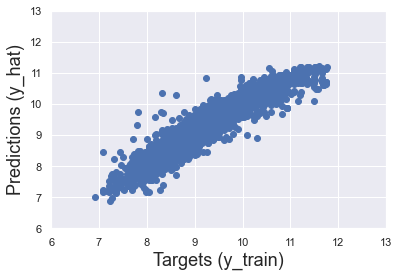

In [42]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

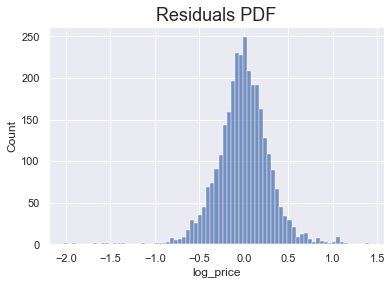

In [43]:
sns.histplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

### Scoring

the model results in an R² score of 0.885 for the training set

In [44]:
reg.score(x_train,y_train)

0.8851577652196374

### Finding the weights and bias

In [45]:
reg.intercept_

9.41782911295367

In [46]:
reg.coef_

array([-0.10995135,  0.50334697,  0.21635645,  0.02160032,  0.00210577,
       -0.13483738, -0.2043633 , -0.08020855, -0.10797344, -0.09462607,
       -0.07469781, -0.14699505, -0.09932617, -0.15892694, -0.04306907,
       -0.01829512, -0.06522043,  0.25491505])

In [47]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.109951
1,Year,0.503347
2,EngineV,0.216356
3,Brand_BMW,0.021600
4,Brand_Mercedes-Benz,0.002106
5,Brand_Mitsubishi,-0.134837
6,Brand_Renault,-0.204363
7,Brand_Toyota,-0.080209
8,Brand_Volkswagen,-0.107973
9,Body_hatch,-0.094626


## Testing

The R² score matches well with that of the training set, suggesting the model is not overfitting.

In [48]:
reg.score(x_test, y_test)

0.8822023057894474

In [49]:
y_hat_test = reg.predict(x_test)

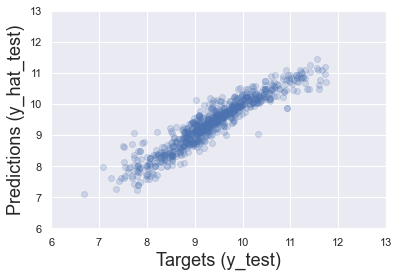

In [50]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

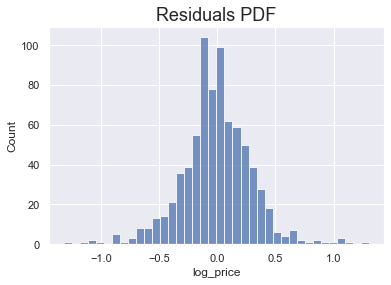

In [51]:
sns.histplot(y_test - y_hat_test)
plt.title("Residuals PDF", size=18)

### Predictions

We can make a table with price predictions by taking the exponential of the log(price) predictions. We can then include the test targets and then calculate the residuals and the percentage error for each prediction.

In [52]:
y_test = y_test.reset_index(drop=True)
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,19605.668311
1,14679.342505
2,1608.946157
3,47815.572620
4,13753.317711


In [53]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,19605.668311,21900.0
1,14679.342505,16999.0
2,1608.946157,2500.0
3,47815.572620,58000.0
4,13753.317711,10000.0
...,...,...
769,25204.674301,25500.0
770,12371.053783,13300.0
771,19494.825039,14500.0
772,4774.510134,5200.0


In [54]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [55]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,19605.668311,21900.0,2294.331689,10.476400
1,14679.342505,16999.0,2319.657495,13.645847
2,1608.946157,2500.0,891.053843,35.642154
3,47815.572620,58000.0,10184.427380,17.559358
4,13753.317711,10000.0,-3753.317711,37.533177
...,...,...,...,...
769,25204.674301,25500.0,295.325699,1.158140
770,12371.053783,13300.0,928.946217,6.984558
771,19494.825039,14500.0,-4994.825039,34.447069
772,4774.510134,5200.0,425.489866,8.182497


In [56]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16168.025454,17490.173437,1322.147982,23.297999
std,13316.838844,19041.516968,9243.789111,26.290111
min,1202.486636,800.000000,-16297.094405,0.054094
25%,6611.710809,6824.750000,-1824.612707,7.576019
50%,12318.622647,11400.000000,-85.459333,16.058908
75%,21484.961097,19875.000000,1493.136032,30.445435
max,92465.152842,126000.000000,81509.749962,271.947932


From here we can see that there are some large prediction errors (the largest is 272%), however 75% of the predictions have an error under 30.5%